In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

behaviors = pd.read_parquet('ebnerd_demo/train/behaviors.parquet')
history = pd.read_parquet('ebnerd_demo/train/history.parquet')
articles = pd.read_parquet('ebnerd_demo/articles.parquet')

print("Behaviors Data Overview:")
print(behaviors.info())
print("History Data Overview:")
print(history.info())
print("Articles Data Overview:")
print(articles.info())

behaviors.describe()



Behaviors Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232887 entries, 0 to 232886
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   impression_id           232887 non-null  uint32        
 1   article_id              70421 non-null   float64       
 2   impression_time         232887 non-null  datetime64[us]
 3   read_time               232887 non-null  float32       
 4   scroll_percentage       69098 non-null   float32       
 5   device_type             232887 non-null  int8          
 6   article_ids_inview      232887 non-null  object        
 7   article_ids_clicked     232887 non-null  object        
 8   user_id                 232887 non-null  uint32        
 9   is_sso_user             232887 non-null  bool          
 10  gender                  16219 non-null   float64       
 11  postcode                4673 non-null    float64       
 12  age  

,impression_id,article_id,impression_time,read_time,scroll_percentage,device_type,user_id,gender,postcode,age,session_id,next_read_time,next_scroll_percentage
count,2.328870e+05,7.042100e+04,232887,232887.000000,69098.000000,232887.000000,2.328870e+05,16219.000000,4673.000000,6341.000000,2.328870e+05,226669.000000,206617.000000
mean,2.882795e+08,9.765423e+06,2023-05-21 16:43:32.126653,43.901806,99.566208,1.685521,1.313502e+06,0.107590,1.438048,55.013405,9.891061e+05,68.649857,69.112617
min,1.494740e+05,3.198681e+06,2023-05-18 07:00:01,0.000000,7.000000,1.000000,1.006800e+04,0.000000,0.000000,0.000000,4.060000e+02,0.000000,0.000000
25%,1.420387e+08,9.772032e+06,2023-05-19 18:51:21,11.000000,100.000000,1.000000,6.866610e+05,0.000000,0.000000,50.000000,5.002430e+05,7.000000,36.000000
50%,2.903336e+08,9.774297e+06,2023-05-21 16:46:53,21.000000,100.000000,2.000000,1.328699e+06,0.000000,1.000000,60.000000,9.911210e+05,21.000000,80.000000
75%,4.331661e+08,9.776882e+06,2023-05-23 10:46:52.500000,45.000000,100.000000,2.000000,1.954176e+06,0.000000,3.000000,60.000000,1.477665e+06,62.000000,100.000000
max,5.801007e+08,9.780271e+06,2023-05-25 06:59:58,1799.000000,100.000000,3.000000,2.590637e+06,1.000000,4.000000,90.000000,2.030118e+06,1799.000000,100.000000
std,1.683194e+08,1.296827e+05,NaN,90.299965,4.944662,0.519545,7.370205e+05,0.309871,1.436164,13.891898,5.682560e+05,172.633560,32.253510


In [55]:
history.describe()


,user_id
count,1.514300e+04
mean,1.305125e+06
std,7.425132e+05
min,1.006800e+04
25%,6.670550e+05
50%,1.311197e+06
75%,1.953018e+06
max,2.590637e+06


In [49]:
articles

,article_id,title,subtitle,last_modified_time,premium,body,published_time,image_ids,article_type,url,...,entity_groups,topics,category,subcategory,category_str,total_inviews,total_pageviews,total_read_time,sentiment_score,sentiment_label
0,3001353,Natascha var ikke den første,"Politiet frygter nu, at Nataschas bortfører ha...",2023-06-29 06:20:33,False,Sagen om den østriske Natascha og hendes bortf...,2006-08-31 08:06:45,[3150850],article_default,https://ekstrabladet.dk/krimi/article3001353.ece,...,[],"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9955,Negative
1,3003065,Kun Star Wars tjente mere,Biografgængerne strømmer ind for at se 'Da Vin...,2023-06-29 06:20:35,False,Vatikanet har opfordret til at boykotte filmen...,2006-05-21 16:57:00,[3006712],article_default,https://ekstrabladet.dk/underholdning/filmogtv...,...,[],"[Underholdning, Film og tv, Økonomi]",414,"[433, 434]",underholdning,NaN,NaN,NaN,0.8460,Positive
2,3012771,Morten Bruun fyret i SønderjyskE,FODBOLD: Morten Bruun fyret med øjeblikkelig v...,2023-06-29 06:20:39,False,Kemien mellem spillerne i Superligaklubben Søn...,2006-05-01 14:28:40,[3177953],article_default,https://ekstrabladet.dk/sport/fodbold/dansk_fo...,...,[],"[Erhverv, Kendt, Sport, Fodbold, Ansættelsesfo...",142,"[196, 199]",sport,NaN,NaN,NaN,0.8241,Negative
3,3023463,Luderne flytter på landet,I landets tyndest befolkede områder skyder bor...,2023-06-29 06:20:43,False,Det frække erhverv rykker på landet. I den tyn...,2007-03-24 08:27:59,[3184029],article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,...,[],"[Livsstil, Erotik]",118,[133],nyheder,NaN,NaN,NaN,0.7053,Neutral
4,3032577,Cybersex: Hvornår er man utro?,En flirtende sms til den flotte fyr i regnskab...,2023-06-29 06:20:46,False,"De fleste af os mener, at et tungekys er utros...",2007-01-18 10:30:37,[3030463],article_default,https://ekstrabladet.dk/sex_og_samliv/article3...,...,[],"[Livsstil, Partnerskab]",565,[],sex_og_samliv,NaN,NaN,NaN,0.9307,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20733,9803492,Vilde billeder: Vulkan i udbrud i ferieparadis,Der er gang i vulkanen på Hawaiis største ø,2023-06-29 06:49:26,False,Det spyer med lava fra vulkanen Kilauea på Haw...,2023-06-08 05:49:20,"[9803493, 9803494, 9803495, 9803495, 9803494]",article_default,https://ekstrabladet.dk/nyheder/samfund/vilde-...,...,"[LOC, LOC, PER, ORG, ORG]","[Katastrofe, Vejr, Større katastrofe]",118,[133],nyheder,535989.0,100120.0,4112624.0,0.6095,Neutral
20734,9803505,Flyvende Antonsen knuser topspiller,"Verdens nummer syv, Chou Tien-Chen, fik ikke e...",2023-06-29 06:49:26,False,Anders Antonsen har holdt pause fra badmintonb...,2023-06-08 05:54:06,[9803516],article_default,https://ekstrabladet.dk/sport/anden_sport/badm...,...,"[PER, PROD, PER, PER, MISC, MISC, PER, PER, LO...","[Kendt, Begivenhed, Sport, Ketcher- og batspor...",142,"[327, 330]",sport,13320.0,959.0,55691.0,0.8884,Positive
20735,9803525,"Dansk skuespiller: - Jeg nægtede, at jeg var syg",Julie R. Ølgaard fik akut kejsersnit og fødte ...,2023-06-29 06:49:26,False,"Mens hun lå søvnløs, lød kakofonien fra baggår...",2023-06-08 06:45:46,"[9803518, 9803519, 9803520, 9803521, 9803522, ...",article_default,https://ekstrabladet.dk/underholdning/dkkendte...,...,"[PER, PROD, PER, PER, PER, PER, MISC]","[Kendt, Livsstil, Familieliv, Underholdning, F...",414,[425],underholdning,315391.0,50361.0,2550671.0,0.7737,Negative
20736,9803560,Så slemt er det: 14.000 huse er oversvømmet,Tusindvis af huse står under vand i Kherson-re...,2023-06-29 06:49:26,False,Et område på omkring 600 kvadratkilometer står...,2023-06-08 06:25:42,None,article_default,https://ekstrabladet.dk/nyheder/saa-slemt-er-d...,...,"[LOC, LOC, LOC, PROD, PER, LOC, ORG, ORG, LOC]","[International politik, Katastrofe, Større kat...",118,[],nyheder,21318.0,1237.0,67514.0,0.9927,Negative


## Session

In [56]:
print("Unique Users and Items:")
unique_users = behaviors['user_id'].nunique()
unique_articles = behaviors['article_id'].nunique()
print(f"Unique Users: {unique_users}, Unique Articles: {unique_articles}")

Unique Users and Items:
Unique Users: 15143, Unique Articles: 1723


Session nength distribution:
count    120587.000000
mean          1.931278
std           1.527727
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          24.000000
dtype: float64


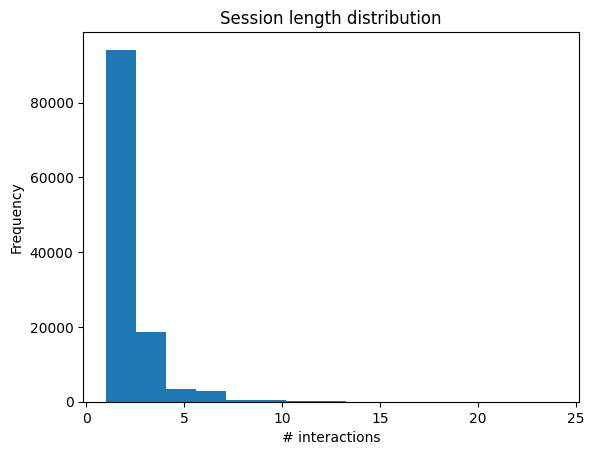

In [67]:
print("Session nength distribution:")
session_lengths = behaviors.groupby('session_id').size()
print(session_lengths.describe())
plt.hist(session_lengths, bins=15)
plt.title('Session length distribution')
plt.xlabel('# interactions')
plt.ylabel('Frequency')
plt.show()



Session Duration:
count                       120587
mean     0 days 00:01:31.142610729
std      0 days 00:03:17.965085179
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:01:33
max                0 days 00:29:44
Name: impression_time, dtype: object


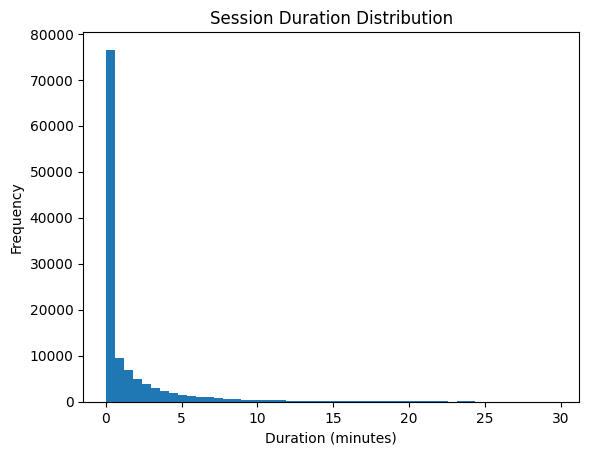

In [26]:
behaviors['impression_time'] = pd.to_datetime(behaviors['impression_time'])
session_durations = behaviors.groupby('session_id')['impression_time'].agg(np.ptp)
print(session_durations.describe())
plt.hist(session_durations.dt.total_seconds() / 60, bins=50)
plt.title('Session Duration Distribution')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()



Interactions per User:
count    15143.000000
mean        15.379185
std         17.763349
min          1.000000
25%          3.000000
50%          9.000000
75%         21.000000
max        155.000000
dtype: float64


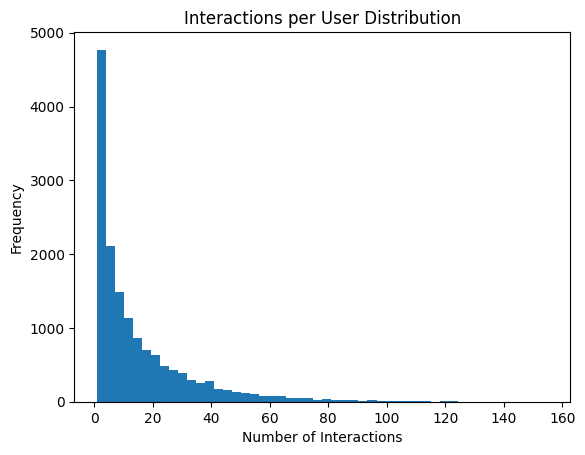

In [5]:
print("Interactions per User:")
interactions_per_user = behaviors.groupby('user_id').size()
print(interactions_per_user.describe())
plt.hist(interactions_per_user, bins=50)
plt.title('Interactions per User Distribution')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()



Time-Based Patterns:


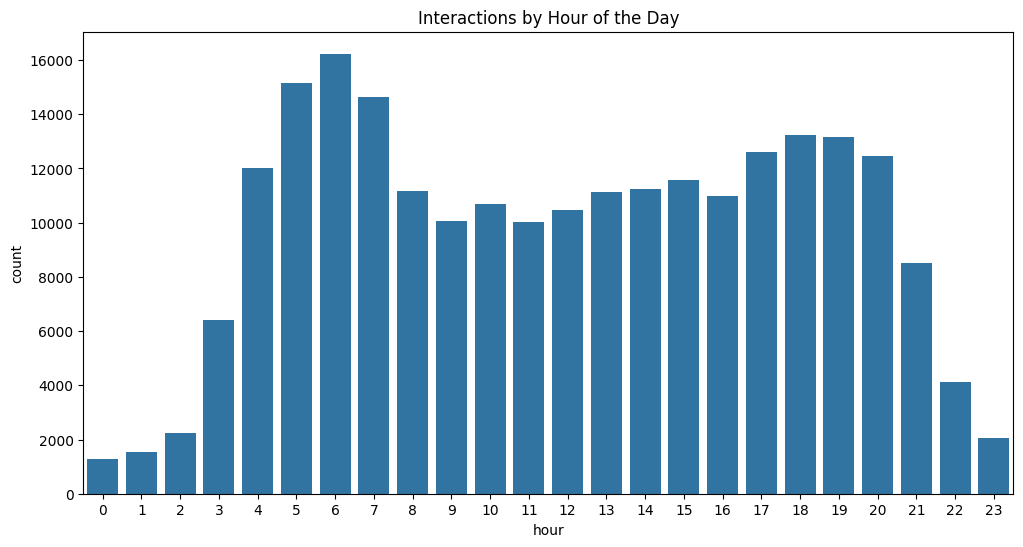

In [7]:

behaviors['hour'] = behaviors['impression_time'].dt.hour
behaviors['day_of_week'] = behaviors['impression_time'].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=behaviors)
plt.title('Interactions by Hour of the Day')
plt.show()


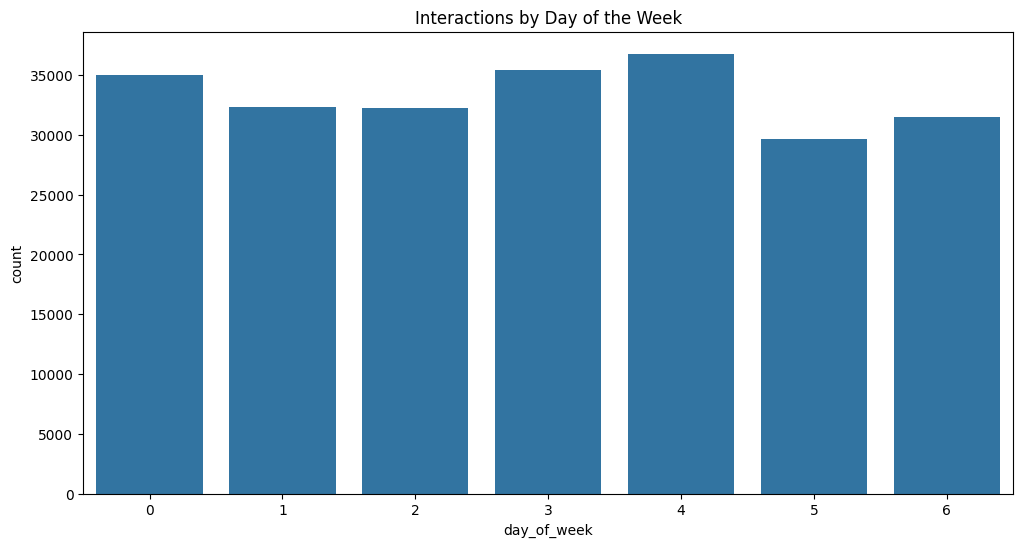

In [8]:

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=behaviors)
plt.title('Interactions by Day of the Week')
plt.show()


Item Popularity:
count    1723.000000
mean       40.871155
std        68.127713
min         1.000000
25%         2.000000
50%         7.000000
75%        54.000000
max       533.000000
Name: count, dtype: float64


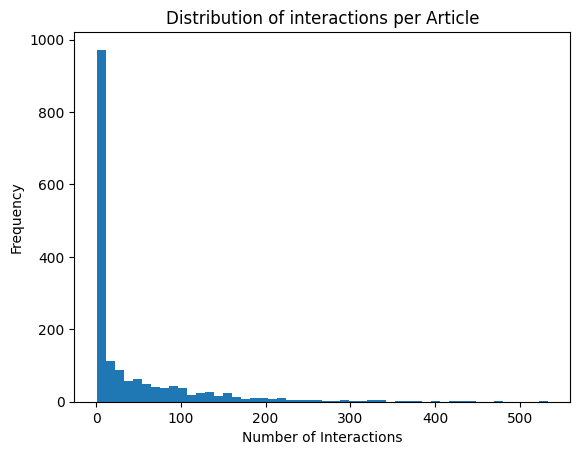

In [29]:

print("Item Popularity:")
item_popularity = behaviors['article_id'].value_counts()
print(item_popularity.describe())
plt.hist(item_popularity, bins=50)
plt.title('Distribution of interactions per Article')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

In [41]:

behaviors['hour_of_day'] = behaviors['impression_time'].dt.hour
behaviors['day_of_week'] = behaviors['impression_time'].dt.dayofweek

print("Interaction features:")
user_interactions = behaviors.groupby('user_id').agg({
    'read_time': 'sum',
    'scroll_percentage': 'mean',
    'impression_id': 'count'
}).rename(columns={'impression_id': 'interaction_count'})
print(user_interactions.head())

print(" user Item Interactions:")
user_profiles = behaviors.groupby('user_id').agg({
    'read_time': 'mean',
    'scroll_percentage': 'mean',
    'device_type': pd.Series.mode
})
item_profiles = behaviors.groupby('article_id').agg({
    'read_time': 'mean',
    'scroll_percentage': 'mean',
    'impression_id': 'count'
}).rename(columns={'impression_id': 'interaction_count'})
user_profiles.head()


Interaction features:
         read_time  scroll_percentage  interaction_count
user_id                                                 
10068        202.0              100.0                  2
10200        401.0              100.0                 21
10201        140.0              100.0                  2
10623        212.0              100.0                 14
10701       1909.0              100.0                 56
 user Item Interactions:


,read_time,scroll_percentage,device_type
user_id,,,
10068,101.000000,100.0,2
10200,19.095238,100.0,2
10201,70.000000,100.0,1
10623,15.142858,100.0,2
10701,34.089287,100.0,1


In [42]:
item_profiles.head()

,read_time,scroll_percentage,interaction_count
article_id,,,
3198681.0,58.00,100.0,1
4012996.0,39.75,100.0,4
4039009.0,20.00,100.0,1
4046231.0,96.50,100.0,2
4059351.0,80.00,100.0,1


Top 10 Sessions with Most Interactions:
session_id
1198586    24
1912684    24
846156     23
1198589    23
1198591    22
115736     22
756367     22
1149553    21
1198582    20
1134026    20
Name: count, dtype: int64
Engagement Metrics for Top Sessions:
   session_id  total_read_time  average_read_time  total_scroll_percentage  \
0      115736            307.0          13.954545                    100.0   
1      756367            357.0          16.227272                      0.0   
2      846156            324.0          14.086957                    100.0   
3     1134026            194.0           9.700000                      0.0   
4     1149553            219.0          10.428572                      0.0   
5     1198582            314.0          15.700000                      0.0   
6     1198586            401.0          16.708334                      0.0   
7     1198589            317.0          13.782609                      0.0   
8     1198591            237.0          10.7

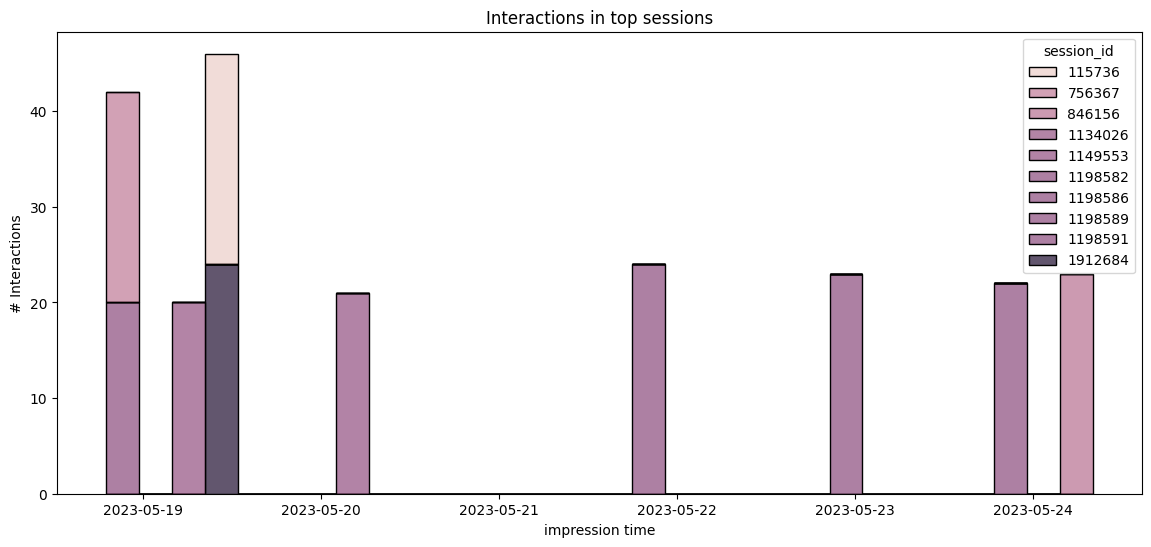

Most popular session details (session ID: 1198586):
        impression_id  article_id     impression_time  read_time  \
111645      277165764         NaN 2023-05-21 20:18:19        9.0   
111646      277165768         NaN 2023-05-21 20:24:06       24.0   
111647      277165770         NaN 2023-05-21 20:15:56       74.0   
111648      277165771         NaN 2023-05-21 20:22:58       48.0   
111649      277165772         NaN 2023-05-21 20:17:50        4.0   
111650      277165773         NaN 2023-05-21 20:12:54       20.0   
111651      277165775         NaN 2023-05-21 20:19:39       10.0   
111652      277165779         NaN 2023-05-21 20:29:00       20.0   
111653      277165782         NaN 2023-05-21 20:18:43        7.0   
111654      277165784         NaN 2023-05-21 20:24:36        7.0   
111655      277165786         NaN 2023-05-21 20:26:05       10.0   
111656      277165787         NaN 2023-05-21 20:22:37        4.0   
111657      277165788         NaN 2023-05-21 20:10:55        4.0

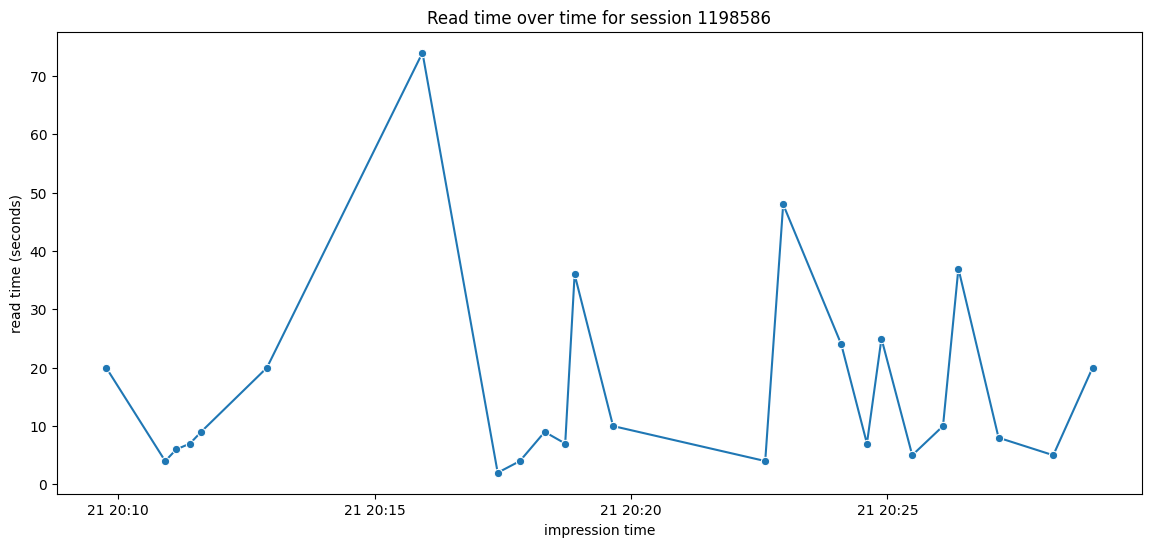

In [39]:
behaviors['impression_time'] = pd.to_datetime(behaviors['impression_time'])

session_interaction_counts = behaviors['session_id'].value_counts()
top_sessions = session_interaction_counts.head(10)
print("Top 10 Sessions with Most Interactions:")
print(top_sessions)

top_sessions_data = behaviors[behaviors['session_id'].isin(top_sessions.index)]

top_sessions_metrics = top_sessions_data.groupby('session_id').agg({
    'read_time': ['sum', 'mean'],
    'scroll_percentage': ['sum', 'mean']
}).reset_index()
top_sessions_metrics.columns = ['session_id', 'total_read_time', 'average_read_time', 'total_scroll_percentage', 'average_scroll_percentage']

print("Engagement Metrics for Top Sessions:")
print(top_sessions_metrics)

plt.figure(figsize=(14, 6))
sns.histplot(top_sessions_data, x='impression_time', hue='session_id', multiple='stack', bins=30)
plt.title('Interactions in top sessions')
plt.xlabel('impression time')
plt.ylabel('# Interactions')

plt.show()

most_popular_session_id = top_sessions.index[0]
most_popular_session_data = behaviors[behaviors['session_id'] == most_popular_session_id]

print(f"Most popular session details (session ID: {most_popular_session_id}):")
print(most_popular_session_data)

plt.figure(figsize=(14, 6))
sns.lineplot(data=most_popular_session_data, x='impression_time', y='read_time', marker='o')
plt.title(f'Read time over time for session {most_popular_session_id}')
plt.xlabel('impression time')
plt.ylabel('read time (seconds)')
plt.show()



In [12]:


behaviors['impression_time'] = pd.to_datetime(behaviors['impression_time'])

clicked_articles = behaviors[behaviors['article_id'].notnull()]
article_click_counts = clicked_articles['article_id'].value_counts()
print("Top 10 Most Clicked Articles:")
print(article_click_counts.head(10))




Top 10 Most Clicked Articles:
article_id
9773282.0    533
9775562.0    472
9776234.0    443
9775776.0    428
9771919.0    417
9779748.0    405
9775484.0    376
9774142.0    370
9770082.0    365
9779737.0    361
Name: count, dtype: int64


Top 10 Most Clicked Articles in the Short Term:
article_id
9779748.0    342
9779737.0    290
9779860.0    236
9780195.0    224
9779538.0    215
9778168.0    212
9779289.0    210
9778731.0    203
9780096.0    196
9778804.0    191
Name: count, dtype: int64
User-Article Interaction Matrix for Recent Interactions:
article_id  3198681.0  4046231.0  4059351.0  4129158.0  4774387.0  5718239.0  \
user_id                                                                        
10068               0          0          0          0          0          0   
10201               0          0          0          0          0          0   
10623               0          0          0          0          0          0   
10701               0          0          0          0          0          0   
11132               0          0          0          0          0          0   

article_id  5902663.0  6190327.0  6290485.0  6640267.0  ...  9779996.0  \
user_id                                              

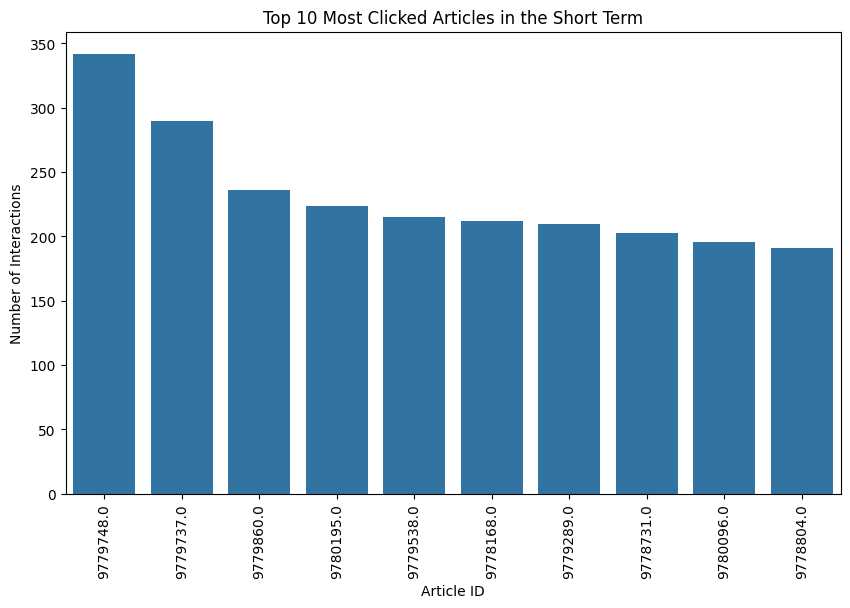

In [13]:
from datetime import timedelta
# Convert 'impression_time' to datetime
behaviors['impression_time'] = pd.to_datetime(behaviors['impression_time'])

# Define the short-term window (e.g., last 7 days)
short_term_window = timedelta(days=7)
end_time = behaviors['impression_time'].max()
start_time = end_time - short_term_window

# Filter interactions within the short-term window
short_term_behaviors = behaviors[(behaviors['impression_time'] >= start_time) & (behaviors['impression_time'] <= end_time)]

# Extract the most recent interactions for each user
recent_interactions = short_term_behaviors.sort_values(by=['user_id', 'impression_time']).groupby('user_id').tail(5)

# Identify most frequently interacted articles in the short term
recent_article_clicks = recent_interactions['article_id'].value_counts()
print("Top 10 Most Clicked Articles in the Short Term:")
print(recent_article_clicks.head(10))

# User-Article Interaction Matrix for recent interactions
recent_user_article_matrix = recent_interactions.pivot_table(index='user_id', columns='article_id', aggfunc='size', fill_value=0)
print("User-Article Interaction Matrix for Recent Interactions:")
print(recent_user_article_matrix.head())

# Visualize the distribution of recent interactions
plt.figure(figsize=(10, 6))
sns.countplot(x='article_id', data=recent_interactions, order=recent_article_clicks.index[:10])
plt.title('Top 10 Most Clicked Articles in the Short Term')
plt.xlabel('Article ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=90)
plt.show()
